In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df= pd.read_csv(r'C:\Users\PMLS\Desktop\weatherHistory.csv')

In [5]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#preprocessing steps

In [8]:
#checking null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

<Axes: >

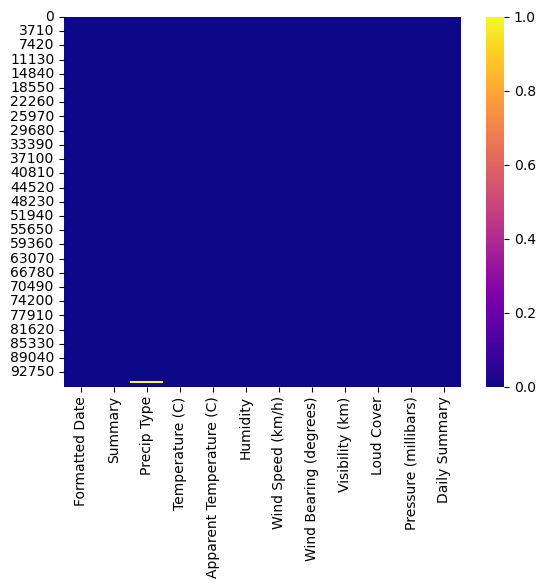

In [10]:
#show null values by graph
sns.heatmap(df.isnull(), cmap='plasma')

In [12]:
df.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [16]:
df.shape

(96453, 12)

In [18]:
df.drop(["Formatted Date","Daily Summary","Loud Cover","Summary"], axis=1 , inplace=True)

In [20]:
df.head(5)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [22]:
df=df.drop_duplicates(keep='first')

In [24]:
df.head(4)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41


In [26]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#convert catagorial data into numerical
le= LabelEncoder()
df['Precip Type']=le.fit_transform(df['Precip Type'])

In [30]:
df.head(3)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94


In [32]:
#split the data into feature Xand target y
X= df[['Precip Type','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
y=df['Temperature (C)']

In [34]:
#split the data into training and testing
X_train,X_test, y_train,y_test=train_test_split(X,y ,test_size=0.2, random_state=42)

In [36]:
#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression, Ridge

In [40]:
# List of models to consider
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost Regressor": xgb.XGBRegressor(),
}

In [42]:
# Dictionary to store the results
results = {
    "models": [],"test rmse": [],"test mae": [],"test mse": []}


In [44]:
#loop through the model
for model_name, model in models.items():
    #fit the model
    model.fit(X_train_scaled, y_train)
    #prediction
    y_test_pred=model.predict(X_test_scaled)
      # Calculate metrics for testing set
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store results in the dictionary
    results["models"].append(model_name)
    results["test rmse"].append(test_rmse)
    results["test mae"].append(test_mae)
    results["test mse"].append(test_mse)

In [46]:
# a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [48]:
# Sort the DataFrame based on Test RMSE in ascending order
sorted_results_df = results_df.sort_values(by='test rmse')

In [50]:
print("Ranking Table for Testing Metrics:")
print(sorted_results_df.to_string(index=False, float_format="{:.4f}".format))


Ranking Table for Testing Metrics:
                     models  test rmse  test mae  test mse
    Random Forest Regressor     0.0481    0.0122    0.0023
          XGBoost Regressor     0.1371    0.0623    0.0188
Gradient Boosting Regressor     0.2175    0.1456    0.0473
        K-Nearest Neighbors     0.6839    0.5038    0.4677
           Ridge Regression     0.9505    0.7436    0.9035
          Linear Regression     0.9505    0.7437    0.9035


In [52]:
# a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [54]:
 #Sort the DataFrame based on Test RMSE in ascending order
sorted_results_df = results_df.sort_values(by='test rmse')



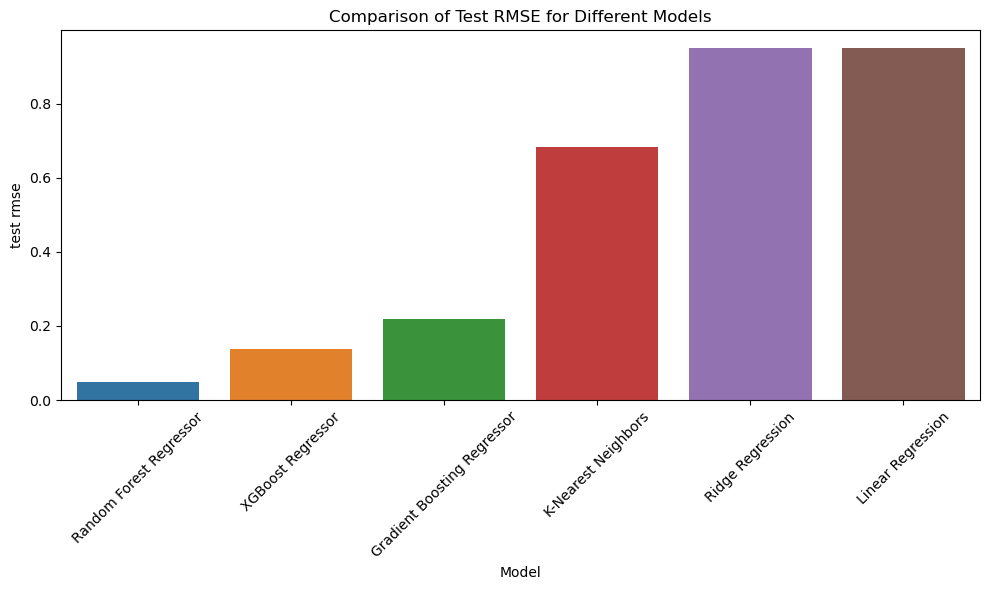

In [56]:
# a bar plot to compare Test RMSE for different models
plt.figure(figsize=(10, 6))
sns.barplot(x='models', y='test rmse', data=sorted_results_df)
plt.title('Comparison of Test RMSE for Different Models')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('test rmse')
plt.tight_layout()
plt.show()